# HOMEWORK: k-Nearest Neighbors

In [274]:
import os

import seaborn as sns

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 500)

from sklearn import preprocessing, neighbors, grid_search, cross_validation
#from sklearn import model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [275]:
df = pd.read_csv('C:\Users\Lauren\GA\Class Repo\DS-SF-32\lessons\lesson-8/dataset-boston.csv')

In [276]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [277]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The Boston dataset concerns itself with housing values in suburbs of Boston.  A description of the dataset is as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sqft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River binary/dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate (per ten thousands of dollars)
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

## Question 1.  
+ Let's first categorize `MEDV` to 4 groups: Bottom 20% as Level 1, next 30% as Level 2, next 30% categorized as Level 3, and the top 20% as Level 4.  
+ Please create a new variable `MEDV_Category` that stores the level number
+ Remember the quantile function
+ Remember how to segment your pandas data frame

In [278]:
Q1=df['MEDV'].quantile(0.2)
Q2=df['MEDV'].quantile(0.5)
Q3=df['MEDV'].quantile(0.8)

In [279]:
#df.loc["Quartile"] = "0"

df.loc[df['MEDV']>Q3, 'MEDV_Category'] = "Level 4"
df.loc[(df['MEDV']>Q2)&(df['MEDV']<=Q3), 'MEDV_Category'] = "Level 3"
df.loc[(df['MEDV']>Q1)&(df['MEDV']<=Q2), 'MEDV_Category'] = "Level 2"
df.loc[df['MEDV']<=Q1, 'MEDV_Category'] = "Level 1"

In [280]:

print df['MEDV'].quantile([0.2,0.5,0.8])

0.2    15.3
0.5    21.2
0.8    28.2
Name: MEDV, dtype: float64


In [281]:
df.loc[df['MEDV']<=Q3] 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV,MEDV_Category
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,Level 3
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Level 3
6,0.08829,12.5,7.87,0,0.5240,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,Level 3
7,0.14455,12.5,7.87,0,0.5240,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,Level 3
8,0.21124,12.5,7.87,0,0.5240,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,Level 2
9,0.17004,12.5,7.87,0,0.5240,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,Level 2
10,0.22489,12.5,7.87,0,0.5240,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,Level 1
11,0.11747,12.5,7.87,0,0.5240,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,Level 2
12,0.09378,12.5,7.87,0,0.5240,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7,Level 3
13,0.62976,0.0,8.14,0,0.5380,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,Level 2


### Our goal is to predict `MEDV_Category` based on `RM`, `PTRATIO`, and `LSTAT`

## Question 2.  

+ First normalize `RM`, `PTRATIO`, and `LSTAT`.  
+ By normalizing, we mean to scale each variable between 0 and 1 with the lowest value as 0 and the highest value as 1

+ Check out the documentation for MinMaxScaler()

In [282]:
from sklearn.preprocessing import MinMaxScaler

In [283]:
mms=MinMaxScaler()

In [284]:
df.loc[:, 'LSTAT'] = mms.fit_transform(df['LSTAT'])
df.loc[:, 'PTRATIO'] = mms.fit_transform(df['PTRATIO'])
df.loc[:, 'RM'] = mms.fit_transform(df['RM'])


C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a sing

In [285]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV,MEDV_Category
0,0.00632,18.0,2.31,0,0.538,0.577505,65.2,4.0900,1,296,0.287234,396.90,0.089680,24.0,Level 3
1,0.02731,0.0,7.07,0,0.469,0.547998,78.9,4.9671,2,242,0.553191,396.90,0.204470,21.6,Level 3
2,0.02729,0.0,7.07,0,0.469,0.694386,61.1,4.9671,2,242,0.553191,392.83,0.063466,34.7,Level 4
3,0.03237,0.0,2.18,0,0.458,0.658555,45.8,6.0622,3,222,0.648936,394.63,0.033389,33.4,Level 4
4,0.06905,0.0,2.18,0,0.458,0.687105,54.2,6.0622,3,222,0.648936,396.90,0.099338,36.2,Level 4


## Question 3.  

+ Run a k-NN classifier with 5 nearest neighbors and report your misclassification error; set weights to uniform
+ Calculate your misclassification error on the training set

In [286]:
x=df[['RM','PTRATIO','LSTAT']].values

In [287]:
x

array([[ 0.57750527,  0.28723404,  0.08967991],
       [ 0.5479977 ,  0.55319149,  0.2044702 ],
       [ 0.6943859 ,  0.55319149,  0.06346578],
       ..., 
       [ 0.65433991,  0.89361702,  0.10789183],
       [ 0.61946733,  0.89361702,  0.13107064],
       [ 0.47307913,  0.89361702,  0.16970199]])

In [288]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(x[:,:],df['MEDV_Category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [289]:
print knn.score(x[:,:], df['MEDV_Category'])

0.786561264822


In [290]:
print "predicted outcome", knn.predict(x[:,:])
print "observed outcome", df['MEDV_Category']

knn.predict(x[:,:]).shape
df['MEDV_Category'].shape

predicted outcome ['Level 4' 'Level 3' 'Level 4' 'Level 4' 'Level 4' 'Level 3' 'Level 3'
 'Level 2' 'Level 2' 'Level 2' 'Level 2' 'Level 3' 'Level 2' 'Level 2'
 'Level 2' 'Level 2' 'Level 2' 'Level 2' 'Level 2' 'Level 2' 'Level 1'
 'Level 2' 'Level 1' 'Level 1' 'Level 2' 'Level 2' 'Level 2' 'Level 2'
 'Level 2' 'Level 2' 'Level 1' 'Level 2' 'Level 1' 'Level 2' 'Level 1'
 'Level 3' 'Level 3' 'Level 2' 'Level 3' 'Level 3' 'Level 4' 'Level 4'
 'Level 3' 'Level 3' 'Level 2' 'Level 2' 'Level 2' 'Level 2' 'Level 2'
 'Level 2' 'Level 2' 'Level 2' 'Level 3' 'Level 2' 'Level 2' 'Level 4'
 'Level 3' 'Level 4' 'Level 3' 'Level 2' 'Level 2' 'Level 2' 'Level 3'
 'Level 3' 'Level 4' 'Level 3' 'Level 3' 'Level 2' 'Level 2' 'Level 2'
 'Level 3' 'Level 3' 'Level 3' 'Level 3' 'Level 3' 'Level 3' 'Level 2'
 'Level 2' 'Level 2' 'Level 2' 'Level 3' 'Level 3' 'Level 3' 'Level 3'
 'Level 3' 'Level 3' 'Level 2' 'Level 3' 'Level 4' 'Level 4' 'Level 3'
 'Level 3' 'Level 3' 'Level 3' 'Level 3' 'Level 3' 'Level 2

(506L,)

## Question 4. 
+ Is this error reliable? 
+ What could we do to make it better?

This shows a fairly low score, indicating a somewhat significant degree of error.

We could do a number of things, including changing the number of quantiles, changing our k, or even the weights or metric. 

## Question 5.  
+ Now use 10-fold cross-validation to choose the most efficient `k`

In [291]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

#Let's do uniform and distance....

k = range(1,100)
params = {'n_neighbors':k, 'weights':['uniform','distance']}

kf = cross_validation.KFold(len(df), n_folds = 10)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(x[:,:], df['MEDV_Category'])
gs.grid_scores_

[mean: 0.60870, std: 0.08988, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.60870, std: 0.08988, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.65020, std: 0.08319, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.60870, std: 0.08988, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.66601, std: 0.09219, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.65613, std: 0.09801, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.67194, std: 0.07574, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.65810, std: 0.09870, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.65810, std: 0.09574, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.66996, std: 0.10655, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.67984, std: 0.08695, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.67589, std: 0.09913, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.68577, std: 0.08847, para

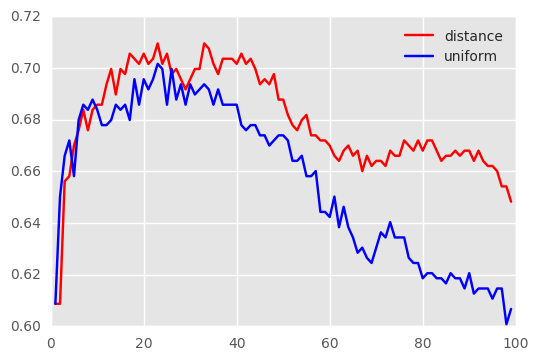

In [294]:
mink_dist, = plt.plot(k,[s[1] for s in  gs.grid_scores_[1::2]], color='red', label='distance')
mink_uni, = plt.plot(k,[s[1] for s in  gs.grid_scores_[::2]], color='blue', label = 'uniform')
plt.legend()

## Question 6.  

+ Explain your findings
+ What were your best parameters?
+ What was the best k?
+ What was the best model?

It seems that the classifier is not perfect, which makes sense, because unlike the iris dataset, there are a lot more variables that play into the median value of a house, (ie, there probably are not as defined of clusters as with iris speciality).

The distance-based classifier appeared to give the best score of approximately 0.71. However both uniform and distance appeared to be similar predictors between k<25.

The best k value appeared around 34.

## Question 7.  

+ Train your model with the optimal `k` you found above 
+ (don't worry if it changes from time to time - if that is the case use the one that is usually the best)

In [320]:
from sklearn.cross_validation import train_test_split
import numpy as np

X=x
y=df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
#Ridge Regression

In [321]:
from sklearn import linear_model
lr = linear_model.Ridge(normalize=False)

In [322]:
lr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [323]:
lr.score(X_test, y_test)

0.62320959124261144

In [324]:
print lr.coef_

[ 18.5777709  -10.80264083 -20.80714446]


These coefficients make sense...

RM (rooms)= more rooms, higher median value

PTRATIO = lower the pupil/teacher ratio, higher median value (school funding based on rents)

LSTAT = % lower status of the population = lower percent, higher median value

## Question 8.  

+ After training your model with that `k`, 
+ use it to *predict* the class of a neighborhood with `RM = 2`, `PRATIO = 19`, and `LSTAT = 3.5`
+ If you are confused, check out the sklearn documentation for KNN

In [345]:
z=[2,19,50]


In [346]:
z2=mms.fit_transform(z[:])
print z2

[ 0.          0.35416667  1.        ]


C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [347]:
knn.predict(z)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Level 1'], dtype=object)

Level (Quantile) 1: This seems to make sense. This is a very low room value, high p/t ratio, though it is a low lstat, the PTRATIO and RM are such that it doesn't matter.